In [2]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\adam\Desktop\Combustioncode-master\DAEM-Modified.xlsx')
s1 = wb['Darrow\'s blueberry_dead']
t = get_xcel_col(s1, 'A', 11, 57) #57
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

In [4]:
A1 = 4000
E1 = 60200
Y1 = .33
A2 = 11839
E2 = 75350
Y2 = 0.31

def r_m(A1,E1,Y1,A2,E2,Y2):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -((A1*np.exp(-E1/R/T[0]))+(A2*np.exp(-E2/R/T[0])))*m[0]
    dV[0] = ((Y1*A1*np.exp(-E1/R/T[0]))+(Y2*A2*np.exp(-E2/R/T[0])))*m[0]
    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -((A1*np.exp(-E1/R/T[i]))+(A2*np.exp(-E2/R/T[i])))*m[i]
        dV[i] = ((Y1*A1*np.exp(-E1/R/T[i]))+(Y2*A2*np.exp(-E2/R/T[i])))*m[i]
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def f(X):
    A1,E1,Y1,A2,E2,Y2 = X
    e1 = (r_e(V_e, t)[0]*.01 - r_m(A1,E1,Y1,A2,E2,Y2)[2]*.01)**2
    e2 = (V_e[1:57] - r_m(A1,E1,Y1,A2,E2,Y2)[1])**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A1,E1,Y1,A2,E2,Y2))
A1,E1,Y1,A2,E2,Y2 = res.x
print(A1)
print(E1)
print(Y1)
print(A2)
print(E2)
print(Y2)

3999.9983926797977
60199.634936628856
8.153365790355028e-05
11838.7251538109
75350.05929958228
-0.00030540181530522813


In [5]:
res

      fun: 8.572394575221907
 hess_inv: array([[ 1.32371274e-01,  1.62641633e-01, -2.59369890e-06,
        -1.48637525e-01,  2.54089162e-01,  9.33714212e-06],
       [ 1.62641633e-01,  9.64320319e-01,  7.88332706e-06,
         2.17698068e-02, -3.63304410e-02, -2.87657223e-05],
       [-2.59369890e-06,  7.88332706e-06,  1.25452773e-08,
         6.96809249e-06, -9.38323521e-06, -4.68733435e-08],
       [-1.48637525e-01,  2.17698068e-02,  6.96809249e-06,
         9.67376949e-01,  5.68384485e-02, -2.53779362e-05],
       [ 2.54089162e-01, -3.63304410e-02, -9.38323521e-06,
         5.68384485e-02,  9.00724092e-01,  3.38446150e-05],
       [ 9.33714212e-06, -2.87657223e-05, -4.68733435e-08,
        -2.53779362e-05,  3.38446150e-05,  1.75137492e-07]])
      jac: array([ 2.05099583e-03, -1.36375427e-03,  3.64554751e+05, -7.69376755e-04,
        1.43337250e-03,  4.73575635e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 948
      nit: 6
     njev: 117

In [6]:
print(r_m(A1,E1,Y1,A2,E2,Y2)[0])

[ 1.00000000e+00  9.92632735e-01  9.82604637e-01  9.69148447e-01
  9.51350895e-01  9.28159742e-01  8.98410430e-01  8.60889080e-01
  8.14435402e-01  7.58123709e-01  6.91440648e-01  6.14686484e-01
  5.29182160e-01  4.37537855e-01  3.43825179e-01  2.53313523e-01
  1.71815299e-01  1.04660891e-01  5.52373291e-02  2.38806560e-02
  7.66386907e-03  1.46949807e-03  6.19095250e-05 -8.05136540e-06
  2.63697169e-06 -1.45937542e-06  1.18320697e-06 -1.30490257e-06
  1.87051652e-06 -3.37857217e-06  7.51839096e-06 -2.02631805e-05
  6.52552969e-05 -2.48322285e-04  1.10635976e-03 -5.72650234e-03
  3.42101314e-02 -2.34444688e-01  1.83247608e+00 -1.62611923e+01
  1.63156175e+02 -1.84364544e+03  2.33918335e+04 -3.32165331e+05
  5.26378371e+06]


In [7]:
print(r_m(A1,E1,Y1,A2,E2,Y2)[3])

[-1.56750320e-04 -2.13363781e-04 -2.86301920e-04 -3.78671325e-04
 -4.93428774e-04 -6.32964091e-04 -7.98326604e-04 -9.88376119e-04
 -1.19812113e-03 -1.41878853e-03 -1.63306732e-03 -1.81924094e-03
 -1.94987883e-03 -1.99388674e-03 -1.92577992e-03 -1.73400477e-03
 -1.42881718e-03 -1.05156515e-03 -6.67163258e-04 -3.45038019e-04
 -1.31795128e-04 -2.99486925e-05 -1.48852958e-06  2.27411427e-07
 -8.71563215e-08  5.62251573e-08 -5.29385009e-08  6.75621083e-08
 -1.11682738e-07  2.31850279e-07 -5.91097265e-07  1.81954207e-06
 -6.67186345e-06  2.88230221e-05 -1.45380045e-04  8.49715611e-04
 -5.71605998e-03  4.39770376e-02 -3.84971667e-01  3.81739079e+00
 -4.26979068e+01  5.36925084e+02 -7.56504604e+03  1.19062746e+05
 -2.08678957e+06]


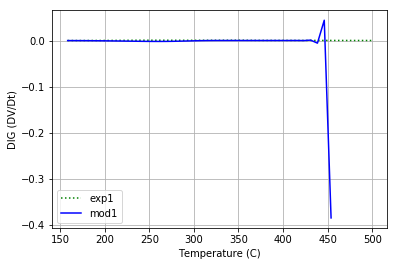

In [8]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:40],r_m(A1,E1,Y1,A2,E2,Y2)[3][0:39],color = 'blue',label='mod1')

plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

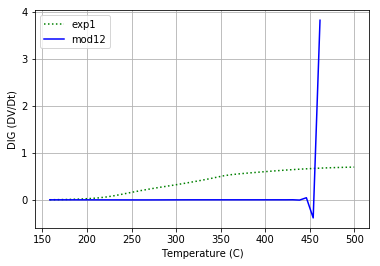

In [9]:
plt.plot(T_c[1:46],V_e[1:46],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:41],r_m(A1,E1,Y1,A2,E2,Y2)[3][0:40],color = 'blue',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()